In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [3]:
df = pd.read_csv('../data/movies_1980_2020_30k.csv')

In [26]:
df

,Title,Director,Genre,Release Date,Duration,Rating
0,Key entire popular.,Anthony Becker,Horror,1981-05-12,102,6.8
1,Gun husband reveal.,William Johnson,Documentary,2016-06-13,92,7.6
2,Crime cover.,Amy Le,Drama,1988-03-22,144,5.5
3,Challenge.,Andrea Martinez,Romance,2013-04-01,161,2.0
4,Close study.,Michael Rodgers,Fantasy,2012-10-18,177,3.7
...,...,...,...,...,...,...
29995,Daughter.,Richard Nelson,Romance,2007-03-12,177,8.0
29996,Simply.,Jeffrey Hatfield,Fantasy,2011-08-16,126,5.7
29997,Also authority nor.,Ryan Brown,Action,1998-05-07,73,4.9
29998,Total report upon.,Melissa Stephenson,Comedy,2008-06-06,145,6.9


In [25]:
df.groupby('Genre').agg(Rating_Mean = ('Rating','mean'), Rating_Median = ('Rating','median'))

,Rating_Mean,Rating_Median
Genre,,
Action,5.520205,5.5
Adventure,5.546187,5.6
Comedy,5.532536,5.5
Documentary,5.564650,5.6
Drama,5.482596,5.4
Fantasy,5.532032,5.6
Horror,5.530525,5.7
Romance,5.496088,5.5
Sci-Fi,5.529679,5.5


<Axes: xlabel='Genre', ylabel='count'>

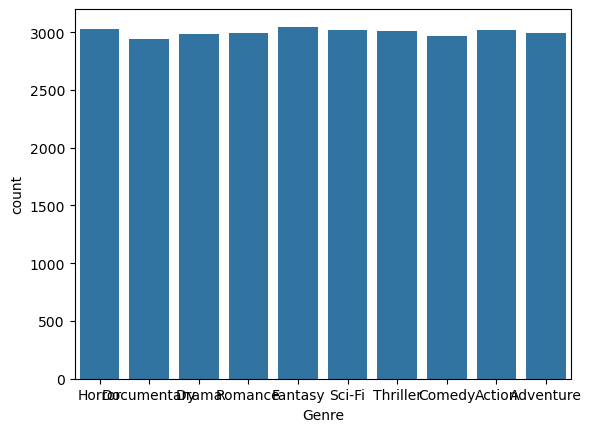

In [13]:
sns.countplot(df, x="Genre")

<Axes: xlabel='Rating'>

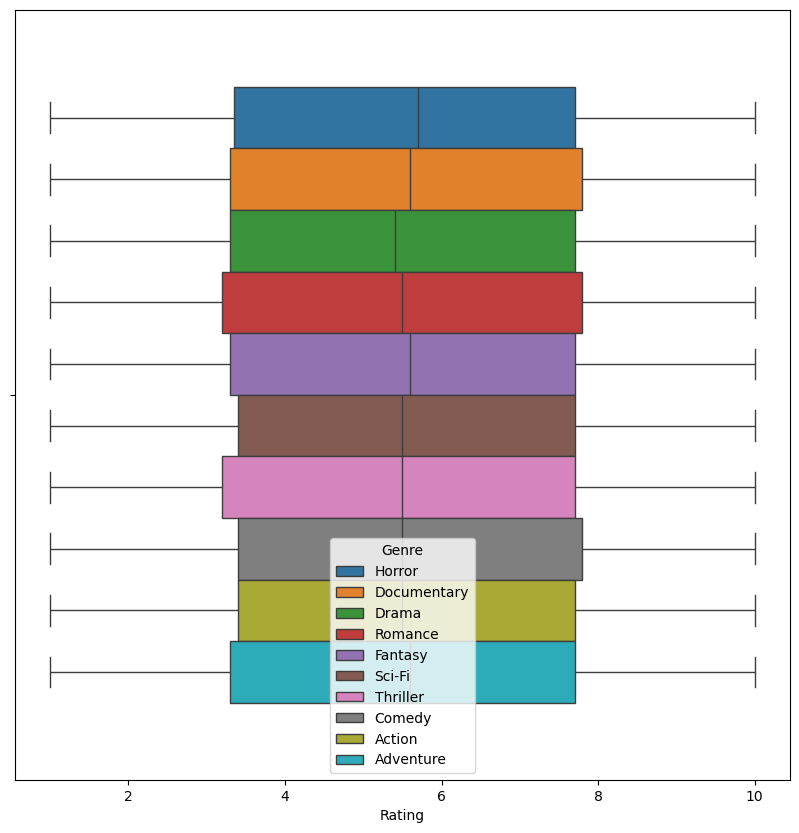

In [18]:
plt.figure(figsize=(10,10))

sns.boxplot(df, x="Rating", hue="Genre")

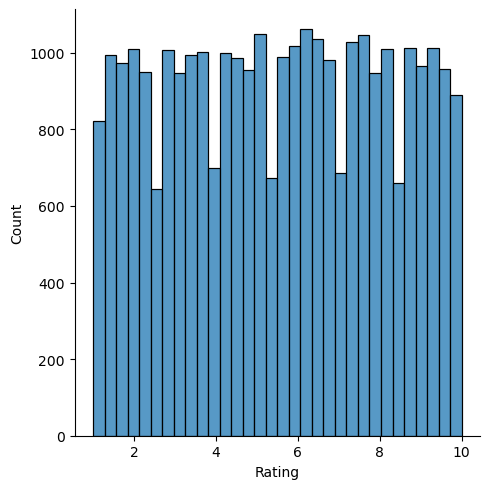

In [28]:
sns.displot(df, x="Rating")

In [31]:
n = 1000000
a_bar = 5; 
a_sd = 1
b_bar = 15; 
b_sd = 1
df_test = pd.DataFrame(dict(a=np.random.normal(a_bar, a_sd, size=n),
                       b=np.random.normal(b_bar, b_sd, size=n)),
                  columns=['a', 'b'])

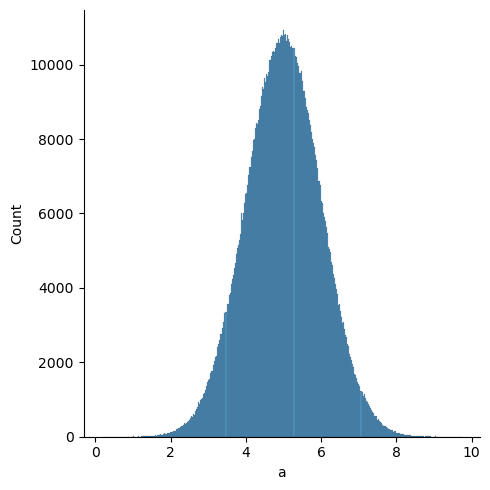

In [38]:
sns.displot(df_test, x="a")


In [40]:
df_test.a.mean()

5.001076697671355

In [39]:
df_test.a.std()

0.9997276800595952

In [53]:
df_test['leading_number'] = df_test.a.astype(str).str[:1]

In [54]:
df_test

,a,b,leading_number
0,5.110624,15.686145,5
1,7.089117,14.557751,7
2,3.726896,16.668243,3
3,4.788306,14.177958,4
4,2.840382,14.507447,2
...,...,...,...
999995,3.744955,13.276344,3
999996,3.699399,15.888459,3
999997,6.174795,15.897621,6
999998,4.749893,15.231468,4


<Axes: xlabel='leading_number', ylabel='count'>

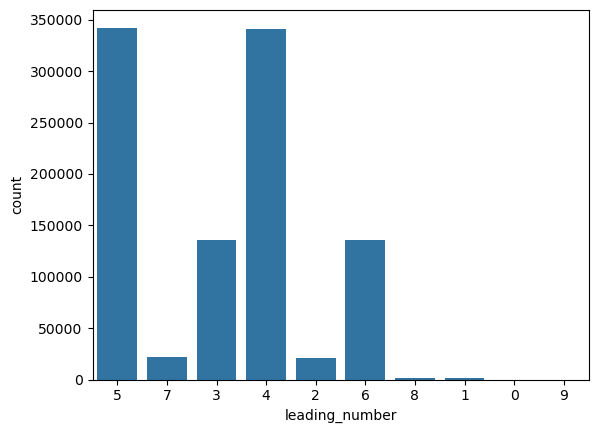

In [55]:
sns.countplot(df_test, x='leading_number')

In [57]:
df_dummies = pd.get_dummies(df, columns=['Director'], prefix="director", drop_first=True)

In [62]:
df_dummies.drop(['Release Date', 'Title'], inplace=True, axis=1)
df_dummies

,Genre,Duration,Rating,director_Aaron Ball,director_Aaron Barrett,director_Aaron Barton,director_Aaron Bishop,director_Aaron Boyd,director_Aaron Bullock,director_Aaron Butler,...,director_Zachary Simpson,director_Zachary Wagner,director_Zachary Waller,director_Zachary Wheeler,director_Zachary Wyatt,director_Zoe Bailey,director_Zoe Berger,director_Zoe Estrada,director_Zoe Jones,director_Zoe Ward
0,Horror,102,6.8,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Documentary,92,7.6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Drama,144,5.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Romance,161,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Fantasy,177,3.7,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Romance,177,8.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,Fantasy,126,5.7,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,Action,73,4.9,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,Comedy,145,6.9,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
le = LabelEncoder()
le.fit(df_dummies.Genre)

LabelEncoder()

In [71]:
df_dummies['Genre']= le.transform(df_dummies['Genre']) 
df_dummies

,Genre,Duration,Rating,director_Aaron Ball,director_Aaron Barrett,director_Aaron Barton,director_Aaron Bishop,director_Aaron Boyd,director_Aaron Bullock,director_Aaron Butler,...,director_Zachary Simpson,director_Zachary Wagner,director_Zachary Waller,director_Zachary Wheeler,director_Zachary Wyatt,director_Zoe Bailey,director_Zoe Berger,director_Zoe Estrada,director_Zoe Jones,director_Zoe Ward
0,6,102,6.8,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,92,7.6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4,144,5.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7,161,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,177,3.7,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,7,177,8.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,5,126,5.7,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,0,73,4.9,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,2,145,6.9,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [80]:
X = df_dummies.drop('Genre', axis=1)
y = df_dummies['Genre']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [91]:
model = LogisticRegression()

model.fit(X_train, y_train)

/opt/anaconda3/envs/Stats/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
predictions = model.predict(X_test)

In [90]:
le.classes_

array(['Action', 'Adventure', 'Comedy', 'Documentary', 'Drama', 'Fantasy',
       'Horror', 'Romance', 'Sci-Fi', 'Thriller'], dtype=object)

In [93]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)

results = {'accuracy': accuracy, 'recall': recall, 'precision': precision}

results

{'accuracy': 0.0996969696969697,
 'recall': array([0.00902708, 0.08540218, 0.00308642, 0.12219959, 0.08385744,
        0.02399232, 0.20858283, 0.099     , 0.26381648, 0.10456853]),
 'precision': array([0.13846154, 0.09817352, 0.10714286, 0.09324009, 0.09291521,
        0.0862069 , 0.10125969, 0.10216718, 0.10144346, 0.10662526])}

In [97]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [98]:
predictions = rf.predict(X_test)

In [99]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)

results = {'accuracy': accuracy, 'recall': recall, 'precision': precision}

results

{'accuracy': 0.09838383838383838,
 'recall': array([0.09829488, 0.08738828, 0.07304527, 0.06517312, 0.11530398,
        0.13339731, 0.14371257, 0.055     , 0.1105318 , 0.10050761]),
 'precision': array([0.09693373, 0.08610568, 0.09659864, 0.09195402, 0.092827  ,
        0.12076455, 0.0991053 , 0.10242086, 0.09201389, 0.10334029])}